In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
# Try to load jobs.csv
try:
    jobs_df = pd.read_csv('datasets/jobs.csv')
    print(f"✅ Jobs dataset loaded: {len(jobs_df)} jobs")
except FileNotFoundError:
    print("❌ ERROR: jobs.csv not found in 'datasets/' folder")
    print("💡 Make sure your jobs.csv file is in the datasets folder")
    print("Current directory:", os.getcwd())
    jobs_df = None

✅ Jobs dataset loaded: 600 jobs


In [4]:
# Try to load candidates.csv
try:
    candidates_df = pd.read_csv('datasets/candidates.csv')
    print(f"✅ Candidates dataset loaded: {len(candidates_df)} candidates")
except FileNotFoundError:
    print("❌ ERROR: candidates.csv not found in 'datasets/' folder")
    print("💡 Make sure your candidates.csv file is in the datasets folder")
    candidates_df = None

✅ Candidates dataset loaded: 700 candidates


In [5]:
if jobs_df is not None and candidates_df is not None:
    print("🎉 Both datasets loaded successfully!")
    print(f"\n📊 Jobs dataset shape: {jobs_df.shape}")
    print(f"📊 Candidates dataset shape: {candidates_df.shape}")
    
    print("\n🔍 First job in dataset:")
    print(jobs_df.iloc[0])
    
    print("\n🔍 First candidate in dataset:")
    print(candidates_df.iloc[0])
else:
    print("\n⚠️ Please place your CSV files in the 'datasets/' folder and restart.")

🎉 Both datasets loaded successfully!

📊 Jobs dataset shape: (600, 11)
📊 Candidates dataset shape: (700, 10)

🔍 First job in dataset:
job_id                                                      KG-100111
job_title                                                Data Analyst
company_name                                                      SAP
required_skills                          Marketing, NumPy, Kubernetes
location                                                New York, USA
salary                                               360.03 USD/month
job_type                                                     Contract
experience_level                                               Senior
remote                                                             No
job_description     This role requires strong skills in Marketing,...
requirements                             Marketing, NumPy, Kubernetes
Name: 0, dtype: object

🔍 First candidate in dataset:
user_id                                    

In [6]:
# Diagnostic Cell: Check Salary Format
print("🔍 DIAGNOSTIC: Checking salary column format...")
print("=" * 60)

if jobs_df is not None and 'salary' in jobs_df.columns:
    # Show what's actually in the salary column
    print("First 10 salary values:")
    for i in range(min(10, len(jobs_df))):
        salary_val = jobs_df['salary'].iloc[i]
        print(f"  Row {i}: '{salary_val}' (type: {type(salary_val).__name__})")
    
    # Check for common patterns
    print("\n🔎 Looking for patterns in salary values:")
    
    # Check if it contains currency symbols
    currency_patterns = ['$', 'USD', '€', '£', 'KGS']
    for pattern in currency_patterns:
        count = jobs_df['salary'].astype(str).str.contains(pattern, na=False).sum()
        if count > 0:
            print(f"  Found '{pattern}' in {count} salaries")
    
    # Check if it has text like "per month", "annually", etc.
    text_patterns = ['month', 'year', 'annually', 'hour']
    for pattern in text_patterns:
        count = jobs_df['salary'].astype(str).str.contains(pattern, case=False, na=False).sum()
        if count > 0:
            print(f"  Found '{pattern}' in {count} salaries")
    
    # Check for numeric values
    print("\n🔢 Checking for numeric values:")
    numeric_count = pd.to_numeric(jobs_df['salary'], errors='coerce').notna().sum()
    print(f"  {numeric_count} salaries can be converted to numbers")
    
    # Show some examples that can't be converted
    non_numeric = jobs_df[pd.to_numeric(jobs_df['salary'], errors='coerce').isna()]['salary'].head(5)
    if len(non_numeric) > 0:
        print(f"\n⚠️  Non-numeric salary examples:")
        for val in non_numeric:
            print(f"  - '{val}'")
    
    print("\n💡 Based on this, we'll clean the salary column in the next step.")

🔍 DIAGNOSTIC: Checking salary column format...
First 10 salary values:
  Row 0: '360.03 USD/month' (type: str)
  Row 1: '192.17 USD/month' (type: str)
  Row 2: 'nan' (type: float)
  Row 3: '421.45 USD/month' (type: str)
  Row 4: '334.72 USD/month' (type: str)
  Row 5: '503.09 USD/month' (type: str)
  Row 6: 'nan' (type: float)
  Row 7: '481.54 USD/month' (type: str)
  Row 8: '296.88 USD/month' (type: str)
  Row 9: '147.55 USD/month' (type: str)

🔎 Looking for patterns in salary values:
  Found '$' in 600 salaries
  Found 'USD' in 487 salaries
  Found 'month' in 487 salaries

🔢 Checking for numeric values:
  0 salaries can be converted to numbers

⚠️  Non-numeric salary examples:
  - '360.03 USD/month'
  - '192.17 USD/month'
  - 'nan'
  - '421.45 USD/month'
  - '334.72 USD/month'

💡 Based on this, we'll clean the salary column in the next step.


In [7]:

# Explore Jobs Data (FIXED VERSION)
if jobs_df is not None:
    print("📊 JOBS DATASET EXPLORATION")
    print("=" * 40)
    
    print("Columns available:")
    for i, col in enumerate(jobs_df.columns, 1):
        print(f"{i:2}. {col}")
    
    print(f"\nTotal jobs: {len(jobs_df)}")
    print(f"Job titles: {jobs_df['job_title'].nunique()} unique titles")
    print(f"Companies: {jobs_df['company_name'].nunique()} unique companies")
    print(f"Locations: {jobs_df['location'].nunique()} unique locations")
    
    print("\n💰 Salary information:")
    if 'salary' in jobs_df.columns:
        # First, let's see what type of data we have
        print(f"   Salary column data type: {jobs_df['salary'].dtype}")
        print(f"   First few salary values:")
        print(jobs_df['salary'].head(10).to_string())
        
        # Count different salary formats
        print(f"\n   Sample salary values:")
        sample_salaries = jobs_df['salary'].dropna().head(10).tolist()
        for i, salary in enumerate(sample_salaries, 1):
            print(f"      {i}. {salary} (type: {type(salary).__name__})")
    
    print("\n🎯 Experience levels:")
    if 'experience_level' in jobs_df.columns:
        print(jobs_df['experience_level'].value_counts())
    
    print("\n🏠 Remote work:")
    if 'remote' in jobs_df.columns:
        print(jobs_df['remote'].value_counts())

📊 JOBS DATASET EXPLORATION
Columns available:
 1. job_id
 2. job_title
 3. company_name
 4. required_skills
 5. location
 6. salary
 7. job_type
 8. experience_level
 9. remote
10. job_description
11. requirements

Total jobs: 600
Job titles: 20 unique titles
Companies: 15 unique companies
Locations: 10 unique locations

💰 Salary information:
   Salary column data type: object
   First few salary values:
0    360.03 USD/month
1    192.17 USD/month
2                 NaN
3    421.45 USD/month
4    334.72 USD/month
5    503.09 USD/month
6                 NaN
7    481.54 USD/month
8    296.88 USD/month
9    147.55 USD/month

   Sample salary values:
      1. 360.03 USD/month (type: str)
      2. 192.17 USD/month (type: str)
      3. 421.45 USD/month (type: str)
      4. 334.72 USD/month (type: str)
      5. 503.09 USD/month (type: str)
      6. 481.54 USD/month (type: str)
      7. 296.88 USD/month (type: str)
      8. 147.55 USD/month (type: str)
      9. 754.39 USD/month (type: str)
    

In [8]:
# Fix Cell: Clean Salary Column
print("🧹 Cleaning salary column...")

def clean_salary(salary_value):
    """
    Convert any salary format to a numeric value in USD per month.
    Examples:
    - "$80,000 per year" → 6666.67 (monthly)
    - "80000" → 80000 (assume monthly)
    - "360.03 USD/month" → 360.03
    - "60K" → 60000
    """
    if pd.isna(salary_value):
        return None
    
    # Convert to string for processing
    salary_str = str(salary_value).strip()
    
    # Remove currency symbols and text
    import re
    
    # Remove common text
    salary_str = salary_str.lower()
    salary_str = salary_str.replace('usd', '')
    salary_str = salary_str.replace('$', '')
    salary_str = salary_str.replace(',', '')
    salary_str = salary_str.replace('€', '')
    salary_str = salary_str.replace('£', '')
    
    # Handle K for thousands
    if 'k' in salary_str:
        salary_str = salary_str.replace('k', '')
        try:
            value = float(salary_str) * 1000
        except:
            value = None
    else:
        # Extract numbers
        numbers = re.findall(r'\d+\.?\d*', salary_str)
        if numbers:
            try:
                value = float(numbers[0])
            except:
                value = None
        else:
            value = None
    
    # Check if it's annual and convert to monthly
    if value is not None:
        # If it says "per year", "annually", "yearly"
        if any(word in salary_str for word in ['year', 'annually', 'yr']):
            value = value / 12
        # If it says "per hour"
        elif 'hour' in salary_str:
            value = value * 160  # Approx monthly hours
    
    return value

# Apply cleaning
if jobs_df is not None and 'salary' in jobs_df.columns:
    jobs_df['salary_clean'] = jobs_df['salary'].apply(clean_salary)
    
    print(f"✅ Salary cleaning complete!")
    print(f"   Before cleaning - sample: {jobs_df['salary'].head(3).tolist()}")
    print(f"   After cleaning - sample: {jobs_df['salary_clean'].head(3).tolist()}")
    
    # Show statistics
    print(f"\n📊 Cleaned salary statistics:")
    print(f"   Min: ${jobs_df['salary_clean'].min():,.2f}")
    print(f"   Max: ${jobs_df['salary_clean'].max():,.2f}")
    print(f"   Avg: ${jobs_df['salary_clean'].mean():,.2f}")
    print(f"   Missing: {jobs_df['salary_clean'].isna().sum()} values")
    
    # Fill missing with median
    median_salary = jobs_df['salary_clean'].median()
    jobs_df['salary_clean'] = jobs_df['salary_clean'].fillna(median_salary)
    
    print(f"\n💡 Missing values filled with median: ${median_salary:,.2f}")

# Also clean candidates salary
if candidates_df is not None and 'desired_salary' in candidates_df.columns:
    candidates_df['desired_salary_clean'] = candidates_df['desired_salary'].apply(clean_salary)
    
    # Fill missing with median
    median_desired = candidates_df['desired_salary_clean'].median()
    candidates_df['desired_salary_clean'] = candidates_df['desired_salary_clean'].fillna(median_desired)
    
    print(f"\n✅ Candidates salary cleaned!")
    print(f"   Avg desired salary: ${candidates_df['desired_salary_clean'].mean():,.2f}")

🧹 Cleaning salary column...
✅ Salary cleaning complete!
   Before cleaning - sample: ['360.03 USD/month', '192.17 USD/month', nan]
   After cleaning - sample: [360.03, 192.17, nan]

📊 Cleaned salary statistics:
   Min: $45.34
   Max: $8,004.57
   Avg: $751.90
   Missing: 113 values

💡 Missing values filled with median: $368.64

✅ Candidates salary cleaned!
   Avg desired salary: $465.40


In [9]:
if jobs_df is not None:
    print("📊 JOBS DATASET EXPLORATION")
    print("=" * 40)
    
    print("Columns available:")
    for i, col in enumerate(jobs_df.columns, 1):
        print(f"{i:2}. {col}")
    
    print(f"\nTotal jobs: {len(jobs_df)}")
    print(f"Job titles: {jobs_df['job_title'].nunique()} unique titles")
    print(f"Companies: {jobs_df['company_name'].nunique()} unique companies")
    print(f"Locations: {jobs_df['location'].nunique()} unique locations")
    
    print("\n💰 Salary range (CLEANED):")
    if 'salary_clean' in jobs_df.columns:
        print(f"   Min: ${jobs_df['salary_clean'].min():,.0f}")
        print(f"   Max: ${jobs_df['salary_clean'].max():,.0f}")
        print(f"   Avg: ${jobs_df['salary_clean'].mean():,.0f}")
    elif 'salary' in jobs_df.columns:
        print("   ⚠️ Salary column needs cleaning (contains text)")
    
    print("\n🎯 Experience levels:")
    if 'experience_level' in jobs_df.columns:
        print(jobs_df['experience_level'].value_counts())
    
    print("\n🏠 Remote work:")
    if 'remote' in jobs_df.columns:
        print(jobs_df['remote'].value_counts())

📊 JOBS DATASET EXPLORATION
Columns available:
 1. job_id
 2. job_title
 3. company_name
 4. required_skills
 5. location
 6. salary
 7. job_type
 8. experience_level
 9. remote
10. job_description
11. requirements
12. salary_clean

Total jobs: 600
Job titles: 20 unique titles
Companies: 15 unique companies
Locations: 10 unique locations

💰 Salary range (CLEANED):
   Min: $45
   Max: $8,005
   Avg: $680

🎯 Experience levels:
experience_level
Mid-level    278
Junior       147
Senior       118
Name: count, dtype: int64

🏠 Remote work:
remote
No     533
Yes     67
Name: count, dtype: int64


In [10]:
# Cell: Clean BOTH Salary Columns
print("🧹 Cleaning ALL salary columns...")

def clean_any_salary(salary_value):
    """
    Convert any salary format to a numeric value in USD per month.
    Handles: "$80,000/year", "360.03 USD/month", "60K", "80000", etc.
    """
    if pd.isna(salary_value):
        return None
    
    # Convert to string for processing
    salary_str = str(salary_value).strip()
    
    # If already a number, return it
    try:
        return float(salary_str)
    except:
        pass
    
    # Remove currency symbols and text
    import re
    
    # Store original for debugging
    original = salary_str
    
    # Convert to lowercase
    salary_str = salary_str.lower()
    
    # Remove currency symbols
    salary_str = salary_str.replace('usd', '')
    salary_str = salary_str.replace('$', '')
    salary_str = salary_str.replace('€', '')
    salary_str = salary_str.replace('£', '')
    salary_str = salary_str.replace(',', '')
    salary_str = salary_str.replace('"', '')
    salary_str = salary_str.replace("'", "")
    
    # Handle K for thousands
    has_k = 'k' in salary_str
    if has_k:
        salary_str = salary_str.replace('k', '')
    
    # Extract ALL numbers
    numbers = re.findall(r'\d+\.?\d*', salary_str)
    
    if not numbers:
        # Try one more time with original
        numbers = re.findall(r'\d+\.?\d*', original)
        if not numbers:
            print(f"⚠️ Could not extract number from: '{original}'")
            return None
    
    # Take the first (largest) number
    try:
        value = float(numbers[0])
    except:
        print(f"⚠️ Could not convert '{numbers[0]}' to number from: '{original}'")
        return None
    
    # Multiply by 1000 if had 'K'
    if has_k:
        value = value * 1000
    
    # Check time period and convert to monthly
    original_lower = original.lower()
    
    # If annual or yearly
    if any(word in original_lower for word in ['year', 'annually', 'yr', '/year', 'per year']):
        value = value / 12
    # If hourly
    elif any(word in original_lower for word in ['hour', 'hr', '/hour', 'per hour']):
        value = value * 160  # Approx monthly hours (40 hrs/week * 4 weeks)
    # If weekly
    elif any(word in original_lower for word in ['week', 'wk', '/week', 'per week']):
        value = value * 4  # Approx monthly
    
    # If daily
    elif any(word in original_lower for word in ['day', 'daily', '/day', 'per day']):
        value = value * 20  # Approx monthly (20 working days)
    
    return value

# Clean jobs salary
if jobs_df is not None and 'salary' in jobs_df.columns:
    print("Cleaning jobs salary...")
    jobs_df['salary_clean'] = jobs_df['salary'].apply(clean_any_salary)
    
    # Fill missing with median
    median_jobs = jobs_df['salary_clean'].median()
    jobs_df['salary_clean'] = jobs_df['salary_clean'].fillna(median_jobs)
    
    print(f"✅ Jobs salary cleaned. Median: ${median_jobs:,.2f}")

# Clean candidates desired salary
if candidates_df is not None and 'desired_salary' in candidates_df.columns:
    print("\nCleaning candidates desired salary...")
    candidates_df['desired_salary_clean'] = candidates_df['desired_salary'].apply(clean_any_salary)
    
    # Fill missing with median
    median_candidates = candidates_df['desired_salary_clean'].median()
    candidates_df['desired_salary_clean'] = candidates_df['desired_salary_clean'].fillna(median_candidates)
    
    print(f"✅ Candidates salary cleaned. Median: ${median_candidates:,.2f}")

print("\n🎉 All salary columns cleaned!")

🧹 Cleaning ALL salary columns...
Cleaning jobs salary...
✅ Jobs salary cleaned. Median: $368.64

Cleaning candidates desired salary...
✅ Candidates salary cleaned. Median: $415.15

🎉 All salary columns cleaned!


In [11]:
# Cell 5: Explore Candidates Data (FIXED)
if candidates_df is not None:
    print("\n📊 CANDIDATES DATASET EXPLORATION")
    print("=" * 40)
    
    print("Columns available:")
    for i, col in enumerate(candidates_df.columns, 1):
        print(f"{i:2}. {col}")
    
    print(f"\nTotal candidates: {len(candidates_df)}")
    print(f"Unique locations: {candidates_df['location'].nunique()}")
    
    print("\n💰 Desired salary range (CLEANED):")
    if 'desired_salary_clean' in candidates_df.columns:
        print(f"   Min: ${candidates_df['desired_salary_clean'].min():,.0f}")
        print(f"   Max: ${candidates_df['desired_salary_clean'].max():,.0f}")
        print(f"   Avg: ${candidates_df['desired_salary_clean'].mean():,.0f}")
    elif 'desired_salary' in candidates_df.columns:
        # Show what we have if not cleaned
        print("   ⚠️ Salary column contains text, not numbers")
        print("   Sample values:")
        for i in range(min(5, len(candidates_df))):
            print(f"      {candidates_df['desired_salary'].iloc[i]}")
    
    print("\n🎯 Experience levels:")
    if 'experience_level' in candidates_df.columns:
        print(candidates_df['experience_level'].value_counts())
    
    print("\n🏠 Remote preference:")
    if 'remote_preference' in candidates_df.columns:
        print(candidates_df['remote_preference'].value_counts())
    
    print("\n💼 Preferred job type:")
    if 'preferred_job_type' in candidates_df.columns:
        print(candidates_df['preferred_job_type'].value_counts())


📊 CANDIDATES DATASET EXPLORATION
Columns available:
 1. user_id
 2. full_name
 3. email
 4. location
 5. skills
 6. experience_level
 7. desired_salary
 8. preferred_job_type
 9. remote_preference
10. profile_description
11. desired_salary_clean

Total candidates: 700
Unique locations: 10

💰 Desired salary range (CLEANED):
   Min: $170
   Max: $1,119
   Avg: $465

🎯 Experience levels:
experience_level
Mid-level    303
Junior       281
Senior       116
Name: count, dtype: int64

🏠 Remote preference:
remote_preference
No     497
Yes    203
Name: count, dtype: int64

💼 Preferred job type:
preferred_job_type
Temporary     160
Contract      138
Internship    137
Part-time     137
Full-time     128
Name: count, dtype: int64


📈 Creating simple visualizations...


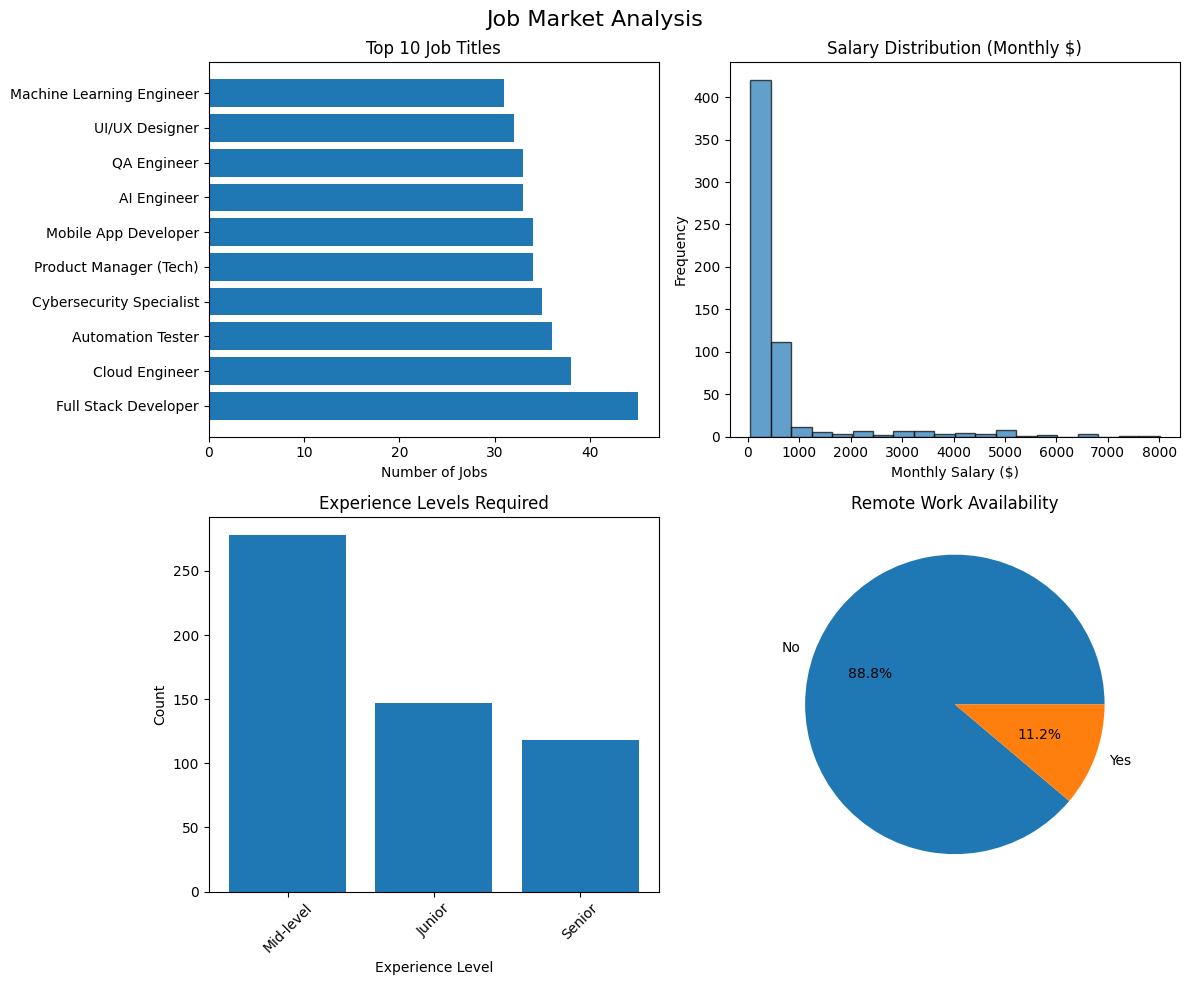

✅ Visualizations created!


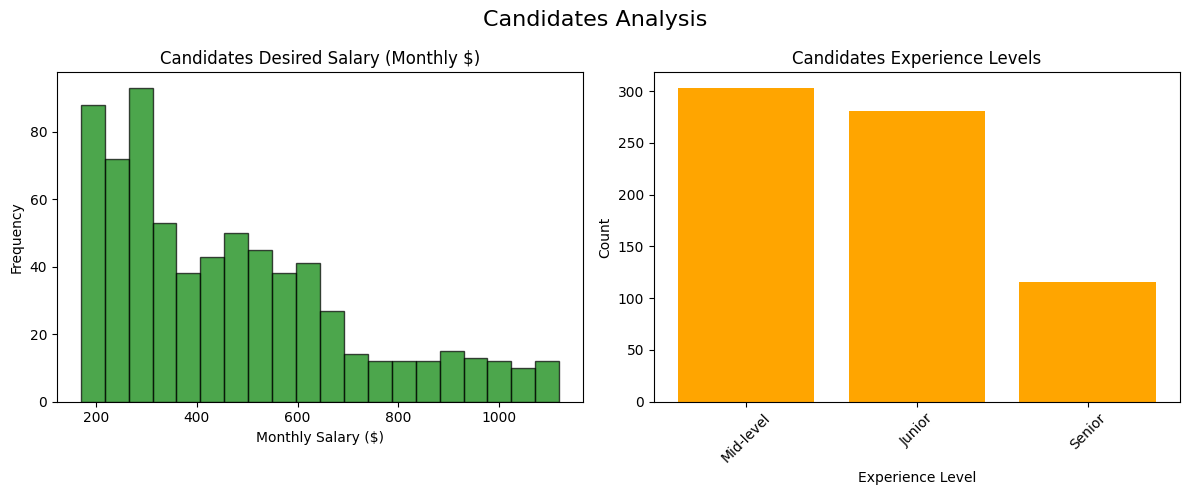

In [12]:
# Cell 6: Simple Visualizations (UPDATED)
import matplotlib.pyplot as plt

if jobs_df is not None:
    print("📈 Creating simple visualizations...")
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Job Market Analysis', fontsize=16)
    
    # 1. Top 10 job titles
    if 'job_title' in jobs_df.columns:
        top_titles = jobs_df['job_title'].value_counts().head(10)
        axes[0, 0].barh(top_titles.index, top_titles.values)
        axes[0, 0].set_title('Top 10 Job Titles')
        axes[0, 0].set_xlabel('Number of Jobs')
    
    # 2. Salary distribution (USE CLEANED)
    if 'salary_clean' in jobs_df.columns:
        axes[0, 1].hist(jobs_df['salary_clean'].dropna(), bins=20, edgecolor='black', alpha=0.7)
        axes[0, 1].set_title('Salary Distribution (Monthly $)')
        axes[0, 1].set_xlabel('Monthly Salary ($)')
        axes[0, 1].set_ylabel('Frequency')
    elif 'salary' in jobs_df.columns:
        axes[0, 1].text(0.5, 0.5, 'Salary data needs cleaning', 
                       ha='center', va='center', transform=axes[0, 1].transAxes)
        axes[0, 1].set_title('Salary Distribution')
    
    # 3. Experience levels
    if 'experience_level' in jobs_df.columns:
        exp_counts = jobs_df['experience_level'].value_counts()
        axes[1, 0].bar(exp_counts.index, exp_counts.values)
        axes[1, 0].set_title('Experience Levels Required')
        axes[1, 0].set_xlabel('Experience Level')
        axes[1, 0].set_ylabel('Count')
        axes[1, 0].tick_params(axis='x', rotation=45)
    
    # 4. Remote work
    if 'remote' in jobs_df.columns:
        remote_counts = jobs_df['remote'].value_counts()
        axes[1, 1].pie(remote_counts.values, labels=remote_counts.index, autopct='%1.1f%%')
        axes[1, 1].set_title('Remote Work Availability')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Visualizations created!")
    
    # Also show candidates visualization
    if candidates_df is not None:
        fig2, axes2 = plt.subplots(1, 2, figsize=(12, 5))
        fig2.suptitle('Candidates Analysis', fontsize=16)
        
        # Candidates salary
        if 'desired_salary_clean' in candidates_df.columns:
            axes2[0].hist(candidates_df['desired_salary_clean'].dropna(), bins=20, 
                         edgecolor='black', alpha=0.7, color='green')
            axes2[0].set_title('Candidates Desired Salary (Monthly $)')
            axes2[0].set_xlabel('Monthly Salary ($)')
            axes2[0].set_ylabel('Frequency')
        
        # Candidates experience
        if 'experience_level' in candidates_df.columns:
            exp_counts_cand = candidates_df['experience_level'].value_counts()
            axes2[1].bar(exp_counts_cand.index, exp_counts_cand.values, color='orange')
            axes2[1].set_title('Candidates Experience Levels')
            axes2[1].set_xlabel('Experience Level')
            axes2[1].set_ylabel('Count')
            axes2[1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()

In [13]:
# Cell 7: Data Cleaning - SIMPLIFIED
print("🧹 Basic Data Cleaning...")

if jobs_df is not None and candidates_df is not None:
    print("\n1. Checking for missing values:")
    
    print("   Jobs dataset missing values:")
    missing_jobs = jobs_df.isnull().sum()
    for col, count in missing_jobs.items():
        if count > 0:
            print(f"      {col}: {count} missing")
    
    print("\n   Candidates dataset missing values:")
    missing_cand = candidates_df.isnull().sum()
    for col, count in missing_cand.items():
        if count > 0:
            print(f"      {col}: {count} missing")
    
    print("\n2. Data types:")
    print("   Jobs data types:")
    for col in jobs_df.columns:
        print(f"      {col}: {jobs_df[col].dtype}")
    
    print("\n   Candidates data types:")
    for col in candidates_df.columns:
        print(f"      {col}: {candidates_df[col].dtype}")
    
    print("\n✅ Basic data inspection complete!")
    
    # Show cleaned data summary
    print("\n📋 SUMMARY OF CLEANED DATA:")
    
    if 'salary_clean' in jobs_df.columns:
        print(f"   Jobs salary (cleaned): ${jobs_df['salary_clean'].mean():,.0f} avg")
    
    if 'desired_salary_clean' in candidates_df.columns:
        print(f"   Candidates desired salary (cleaned): ${candidates_df['desired_salary_clean'].mean():,.0f} avg")
    
    print(f"   Total jobs: {len(jobs_df)}")
    print(f"   Total candidates: {len(candidates_df)}")
else:
    print("❌ Cannot inspect data - datasets not loaded")

🧹 Basic Data Cleaning...

1. Checking for missing values:
   Jobs dataset missing values:
      salary: 113 missing
      experience_level: 57 missing

   Candidates dataset missing values:

2. Data types:
   Jobs data types:
      job_id: object
      job_title: object
      company_name: object
      required_skills: object
      location: object
      salary: object
      job_type: object
      experience_level: object
      remote: object
      job_description: object
      requirements: object
      salary_clean: float64

   Candidates data types:
      user_id: object
      full_name: object
      email: object
      location: object
      skills: object
      experience_level: object
      desired_salary: object
      preferred_job_type: object
      remote_preference: object
      profile_description: object
      desired_salary_clean: float64

✅ Basic data inspection complete!

📋 SUMMARY OF CLEANED DATA:
   Jobs salary (cleaned): $680 avg
   Candidates desired salary (cleaned)

In [14]:
# Diagnostic: Check Salary Conversion
print("🔍 DIAGNOSTIC: Salary Analysis")
print("=" * 60)

if jobs_df is not None:
    print("1. Original Salary Values (First 10):")
    for i in range(min(10, len(jobs_df))):
        original = jobs_df['salary'].iloc[i]
        cleaned = jobs_df['salary_clean'].iloc[i] if 'salary_clean' in jobs_df.columns else None
        print(f"   {i+1:2}. Original: '{original}' → Cleaned: ${cleaned:,.2f}")
    
    print(f"\n2. Salary Statistics:")
    if 'salary_clean' in jobs_df.columns:
        print(f"   Min: ${jobs_df['salary_clean'].min():,.2f}")
        print(f"   Max: ${jobs_df['salary_clean'].max():,.2f}")
        print(f"   Median: ${jobs_df['salary_clean'].median():,.2f}")
        print(f"   Mean: ${jobs_df['salary_clean'].mean():,.2f}")
        
        # Check distribution
        print(f"\n3. Salary Distribution:")
        bins = [0, 100, 500, 1000, 5000, 10000, 50000, float('inf')]
        labels = ['<$100', '$100-500', '$500-1K', '$1K-5K', '$5K-10K', '$10K-50K', '>$50K']
        
        jobs_df['salary_bin'] = pd.cut(jobs_df['salary_clean'], bins=bins, labels=labels)
        distribution = jobs_df['salary_bin'].value_counts().sort_index()
        
        for bin_label, count in distribution.items():
            percentage = (count / len(jobs_df)) * 100
            print(f"   {bin_label:15} {count:4} jobs ({percentage:.1f}%)")
    
    print(f"\n💡 If salaries seem too low, we may need to adjust the cleaning function.")

🔍 DIAGNOSTIC: Salary Analysis
1. Original Salary Values (First 10):
    1. Original: '360.03 USD/month' → Cleaned: $360.03
    2. Original: '192.17 USD/month' → Cleaned: $192.17
    3. Original: 'nan' → Cleaned: $368.64
    4. Original: '421.45 USD/month' → Cleaned: $421.45
    5. Original: '334.72 USD/month' → Cleaned: $334.72
    6. Original: '503.09 USD/month' → Cleaned: $503.09
    7. Original: 'nan' → Cleaned: $368.64
    8. Original: '481.54 USD/month' → Cleaned: $481.54
    9. Original: '296.88 USD/month' → Cleaned: $296.88
   10. Original: '147.55 USD/month' → Cleaned: $147.55

2. Salary Statistics:
   Min: $45.34
   Max: $8,004.57
   Median: $368.64
   Mean: $679.72

3. Salary Distribution:
   <$100             15 jobs (2.5%)
   $100-500         437 jobs (72.8%)
   $500-1K           88 jobs (14.7%)
   $1K-5K            49 jobs (8.2%)
   $5K-10K           11 jobs (1.8%)
   $10K-50K           0 jobs (0.0%)
   >$50K              0 jobs (0.0%)

💡 If salaries seem too low, we may n

In [15]:
# Fix Missing Values
print("🔧 Fixing Missing Values")
print("=" * 60)

# Make copies to avoid modifying originals
jobs_fixed = jobs_df.copy()
candidates_fixed = candidates_df.copy()

print("1. Fixing missing salaries...")
if 'salary_clean' in jobs_fixed.columns:
    # Count missing
    missing_salary = jobs_fixed['salary_clean'].isna().sum()
    print(f"   Missing salaries: {missing_salary}")
    
    # Fill with median (better than mean for salaries)
    salary_median = jobs_fixed['salary_clean'].median()
    jobs_fixed['salary_clean'] = jobs_fixed['salary_clean'].fillna(salary_median)
    print(f"   Filled with median: ${salary_median:,.2f}")

print("\n2. Fixing missing experience levels...")
if 'experience_level' in jobs_fixed.columns:
    # Count missing
    missing_exp = jobs_fixed['experience_level'].isna().sum()
    print(f"   Missing experience levels: {missing_exp}")
    
    # Fill with most common (mode)
    exp_mode = jobs_fixed['experience_level'].mode()
    if len(exp_mode) > 0:
        fill_value = exp_mode.iloc[0]
        jobs_fixed['experience_level'] = jobs_fixed['experience_level'].fillna(fill_value)
        print(f"   Filled with: '{fill_value}'")
    else:
        jobs_fixed['experience_level'] = jobs_fixed['experience_level'].fillna('Mid-level')
        print(f"   Filled with: 'Mid-level' (default)")

print("\n3. Also fix any missing in candidates...")
if 'experience_level' in candidates_fixed.columns:
    missing_cand_exp = candidates_fixed['experience_level'].isna().sum()
    if missing_cand_exp > 0:
        cand_exp_mode = candidates_fixed['experience_level'].mode()
        if len(cand_exp_mode) > 0:
            candidates_fixed['experience_level'] = candidates_fixed['experience_level'].fillna(cand_exp_mode.iloc[0])

print("\n✅ Missing values fixed!")
print(f"   Jobs after fixing: {len(jobs_fixed)}")
print(f"   Candidates after fixing: {len(candidates_fixed)}")

# Update the original dataframes
jobs_df = jobs_fixed
candidates_df = candidates_fixed

🔧 Fixing Missing Values
1. Fixing missing salaries...
   Missing salaries: 0
   Filled with median: $368.64

2. Fixing missing experience levels...
   Missing experience levels: 57
   Filled with: 'Mid-level'

3. Also fix any missing in candidates...

✅ Missing values fixed!
   Jobs after fixing: 600
   Candidates after fixing: 700


In [16]:
# Cell 8: Simple Skill-Based Matching (UPDATED with fixed data)
print("🎯 Simple Skill Matching Algorithm")
print("=" * 50)

if jobs_df is not None and candidates_df is not None:
    # Take first candidate as example
    candidate = candidates_df.iloc[0]
    print(f"Testing with candidate: {candidate['full_name']}")
    print(f"Candidate ID: {candidate['user_id']}")
    
    # Get candidate skills
    candidate_skills = []
    if 'skills' in candidate and pd.notna(candidate['skills']):
        if isinstance(candidate['skills'], str):
            candidate_skills = [skill.strip().lower() for skill in candidate['skills'].split(',')]
    
    print(f"Candidate skills ({len(candidate_skills)}): {candidate_skills}")
    
    # Also show other candidate info
    print(f"Candidate info:")
    print(f"  Experience: {candidate.get('experience_level', 'N/A')}")
    print(f"  Desired salary: ${candidate.get('desired_salary_clean', 'N/A'):,.0f}/month")
    print(f"  Location: {candidate.get('location', 'N/A')}")
    print(f"  Remote preference: {candidate.get('remote_preference', 'N/A')}")
    
    # Check first 5 jobs
    print(f"\n{'='*50}")
    print(f"Checking matches with first 5 jobs:")
    print(f"{'='*50}")
    
    matches_found = 0
    
    for i in range(min(5, len(jobs_df))):
        job = jobs_df.iloc[i]
        
        print(f"\n{'─'*50}")
        print(f"JOB {i+1}: {job['job_title']} at {job['company_name']}")
        print(f"{'─'*50}")
        
        # Job basic info
        print(f"📍 Location: {job.get('location', 'N/A')}")
        print(f"💰 Salary: ${job.get('salary_clean', 'N/A'):,.0f}/month")
        print(f"🎯 Experience needed: {job.get('experience_level', 'N/A')}")
        print(f"🏠 Remote: {job.get('remote', 'N/A')}")
        print(f"💼 Job type: {job.get('job_type', 'N/A')}")
        
        # Get job required skills
        job_skills = []
        if 'required_skills' in job and pd.notna(job['required_skills']):
            if isinstance(job['required_skills'], str):
                job_skills = [skill.strip().lower() for skill in job['required_skills'].split(',')]
        
        # Skill matching
        if not job_skills:
            print(f"\n⚠️ No skills listed for this job")
            continue
        
        print(f"\n📝 Required skills ({len(job_skills)}): {job_skills}")
        
        # Calculate match
        matching_skills = set(candidate_skills) & set(job_skills)
        match_percentage = (len(matching_skills) / len(job_skills)) * 100
        
        print(f"\n🎯 SKILL MATCH ANALYSIS:")
        print(f"   Match percentage: {match_percentage:.1f}%")
        
        if matching_skills:
            print(f"   ✅ Matching skills ({len(matching_skills)}): {list(matching_skills)}")
            matches_found += 1
            
            # Show missing skills
            missing_skills = set(job_skills) - set(candidate_skills)
            if missing_skills:
                print(f"   ❌ Missing skills ({len(missing_skills)}): {list(missing_skills)}")
        else:
            print(f"   ❌ No matching skills")
            missing_skills = set(job_skills)
            print(f"   ❌ All skills missing: {list(missing_skills)}")
    
    print(f"\n{'='*50}")
    print(f"SUMMARY: Found {matches_found} jobs with skill matches out of 5 checked")
    print(f"{'='*50}")
    
else:
    print("❌ Cannot run matching - datasets not loaded")

🎯 Simple Skill Matching Algorithm
Testing with candidate: Sophia Adams
Candidate ID: USR-1159
Candidate skills (4): ['azure', 'power bi', 'pandas', 'c#']
Candidate info:
  Experience: Mid-level
  Desired salary: $507/month
  Location: Berlin, Germany
  Remote preference: Yes

Checking matches with first 5 jobs:

──────────────────────────────────────────────────
JOB 1: Data Analyst at SAP
──────────────────────────────────────────────────
📍 Location: New York, USA
💰 Salary: $360/month
🎯 Experience needed: Senior
🏠 Remote: No
💼 Job type: Contract

📝 Required skills (3): ['marketing', 'numpy', 'kubernetes']

🎯 SKILL MATCH ANALYSIS:
   Match percentage: 0.0%
   ❌ No matching skills
   ❌ All skills missing: ['kubernetes', 'marketing', 'numpy']

──────────────────────────────────────────────────
JOB 2: Full Stack Developer at Sony
──────────────────────────────────────────────────
📍 Location: London, UK
💰 Salary: $192/month
🎯 Experience needed: Mid-level
🏠 Remote: No
💼 Job type: Full-time



In [17]:
# Cell 9: Prepare Features for AI Model (UPDATED with skills emphasis)
print("⚙️ Preparing features for AI model with enhanced skills matching...")
print("=" * 60)

from sklearn.preprocessing import LabelEncoder

if jobs_df is not None and candidates_df is not None:
    # We'll use our already cleaned data
    jobs_for_ai = jobs_df.copy()
    candidates_for_ai = candidates_df.copy()
    
    print("1. Processing SKILLS - Creating skill vectors...")
    
    # First, extract all unique skills from both datasets
    all_skills = set()
    
    # Extract skills from jobs
    for skills_str in jobs_for_ai['required_skills'].dropna():
        if isinstance(skills_str, str):
            skills = [s.strip().lower() for s in skills_str.split(',')]
            all_skills.update(skills)
    
    # Extract skills from candidates
    for skills_str in candidates_for_ai['skills'].dropna():
        if isinstance(skills_str, str):
            skills = [s.strip().lower() for s in skills_str.split(',')]
            all_skills.update(skills)
    
    # Convert to sorted list for consistent indexing
    all_skills = sorted(list(all_skills))
    print(f"   Found {len(all_skills)} unique skills")
    print(f"   Sample skills: {all_skills[:10]}...")
    
    # Create skill vectors for jobs
    print("\n2. Creating job skill vectors...")
    job_skill_vectors = []
    
    for idx, job in jobs_for_ai.iterrows():
        skill_vector = [0] * len(all_skills)
        
        if isinstance(job['required_skills'], str):
            job_skills = [s.strip().lower() for s in job['required_skills'].split(',')]
            for skill in job_skills:
                if skill in all_skills:
                    skill_vector[all_skills.index(skill)] = 1
        
        job_skill_vectors.append(skill_vector)
    
    # Create skill vectors for candidates
    print("3. Creating candidate skill vectors...")
    candidate_skill_vectors = []
    
    for idx, candidate in candidates_for_ai.iterrows():
        skill_vector = [0] * len(all_skills)
        
        if isinstance(candidate['skills'], str):
            cand_skills = [s.strip().lower() for s in candidate['skills'].split(',')]
            for skill in cand_skills:
                if skill in all_skills:
                    skill_vector[all_skills.index(skill)] = 1
        
        candidate_skill_vectors.append(skill_vector)
    
    # Convert to numpy arrays
    job_skill_vectors = np.array(job_skill_vectors)
    candidate_skill_vectors = np.array(candidate_skill_vectors)
    
    print(f"   Created {len(job_skill_vectors)} job skill vectors ({len(all_skills)} dimensions each)")
    print(f"   Created {len(candidate_skill_vectors)} candidate skill vectors")
    
    print("\n4. Encoding experience levels...")
    experience_map = {
        'entry': 1,
        'junior': 2, 
        'mid-level': 3,
        'middle': 3,
        'senior': 4,
        'expert': 5,
        'intern': 1,
        'associate': 2,
        'lead': 4,
        'principal': 5,
        'director': 5
    }
    
    jobs_for_ai['experience_encoded'] = jobs_for_ai['experience_level'].astype(str).str.lower().map(
        lambda x: experience_map.get(x.strip(), 3)  # Default to mid-level
    ).fillna(3)
    
    candidates_for_ai['experience_encoded'] = candidates_for_ai['experience_level'].astype(str).str.lower().map(
        lambda x: experience_map.get(x.strip(), 3)
    ).fillna(3)
    
    print(f"   Experience mapping: {experience_map}")
    
    print("\n5. Encoding locations...")
    all_locations = pd.concat([
        jobs_for_ai['location'].fillna('Unknown'),
        candidates_for_ai['location'].fillna('Unknown')
    ]).astype(str)
    
    location_encoder = LabelEncoder()
    location_encoder.fit(all_locations)
    
    jobs_for_ai['location_encoded'] = location_encoder.transform(
        jobs_for_ai['location'].fillna('Unknown').astype(str)
    )
    candidates_for_ai['location_encoded'] = location_encoder.transform(
        candidates_for_ai['location'].fillna('Unknown').astype(str)
    )
    
    print(f"   Encoded {len(location_encoder.classes_)} unique locations")
    
    print("\n6. Encoding remote preferences...")
    jobs_for_ai['remote_encoded'] = jobs_for_ai['remote'].astype(str).map({
        'yes': 1, 'Yes': 1, 'YES': 1, 'true': 1, 'True': 1, '1': 1,
        'no': 0, 'No': 0, 'NO': 0, 'false': 0, 'False': 0, '0': 0
    }).fillna(0)
    
    candidates_for_ai['remote_preference_encoded'] = candidates_for_ai['remote_preference'].astype(str).map({
        'yes': 1, 'Yes': 1, 'YES': 1, 'true': 1, 'True': 1, '1': 1,
        'no': 0, 'No': 0, 'NO': 0, 'false': 0, 'False': 0, '0': 0
    }).fillna(0)
    
    print("\n7. Encoding job types...")
    job_type_map = {
        'full-time': 1, 'full time': 1, 'fulltime': 1,
        'part-time': 2, 'part time': 2, 'parttime': 2,
        'contract': 3,
        'internship': 4, 'intern': 4,
        'temporary': 5, 'temp': 5,
        'freelance': 6,
        'remote': 7
    }
    
    jobs_for_ai['job_type_encoded'] = jobs_for_ai['job_type'].astype(str).str.lower().map(
        lambda x: job_type_map.get(x.strip(), 1)
    ).fillna(1)
    
    candidates_for_ai['preferred_job_type_encoded'] = candidates_for_ai['preferred_job_type'].astype(str).str.lower().map(
        lambda x: job_type_map.get(x.strip(), 1)
    ).fillna(1)
    
    print("\n✅ Feature preparation complete with enhanced skills!")
    
else:
    print("❌ Cannot prepare features - datasets not loaded")

⚙️ Preparing features for AI model with enhanced skills matching...
1. Processing SKILLS - Creating skill vectors...
   Found 27 unique skills
   Sample skills: ['accounting', 'aws', 'azure', 'c#', 'communication', 'construction', 'customer service', 'django', 'docker', 'excel']...

2. Creating job skill vectors...
3. Creating candidate skill vectors...
   Created 600 job skill vectors (27 dimensions each)
   Created 700 candidate skill vectors

4. Encoding experience levels...
   Experience mapping: {'entry': 1, 'junior': 2, 'mid-level': 3, 'middle': 3, 'senior': 4, 'expert': 5, 'intern': 1, 'associate': 2, 'lead': 4, 'principal': 5, 'director': 5}

5. Encoding locations...
   Encoded 10 unique locations

6. Encoding remote preferences...

7. Encoding job types...

✅ Feature preparation complete with enhanced skills!


In [22]:
# Cell 10: Create Feature Vectors for AI (UPDATED with skills weighting)
print("📊 Creating feature vectors with skills weighting...")
print("=" * 60)

if 'jobs_for_ai' in locals() and 'candidates_for_ai' in locals():
    # Define weights for different features
    # Skills get the highest weight since they're most important
    WEIGHTS = {
        'skills': 5.0,        # Highest weight for skills
        'experience': 1.5,    # Medium weight for experience
        'location': 1.0,      # Standard weight for location
        'salary': 1.0,        # Standard weight for salary
        'remote': 0.8,        # Slightly lower weight for remote
        'job_type': 0.7       # Lowest weight for job type
    }
    
    print(f"Feature weights: {WEIGHTS}")
    
    # 1. Create job feature vectors with weighted components
    print("\n1. Creating job feature vectors...")
    job_features = []
    job_skill_features = []
    job_ids = []
    job_titles = []
    
    for idx, job in jobs_for_ai.iterrows():
        # Skill features (get highest weight later)
        if idx < len(job_skill_vectors):
            skill_features = job_skill_vectors[idx]
        else:
            skill_features = np.zeros(len(all_skills))
        
        # Other features
        other_features = [
            float(job['experience_encoded']),
            float(job['location_encoded']),
            float(job.get('salary_clean', 0)) / 100.0,  # Scale salary
            float(job['remote_encoded']),
            float(job['job_type_encoded'])
        ]
        
        job_features.append(other_features)
        job_skill_features.append(skill_features)
        job_ids.append(job['job_id'])
        job_titles.append(job['job_title'])
    
    job_features = np.array(job_features)
    job_skill_features = np.array(job_skill_features)
    job_ids = np.array(job_ids)
    
    print(f"   Created {len(job_features)} job feature vectors")
    print(f"   Skill dimensions: {job_skill_features.shape[1]}")
    print(f"   Other features: {job_features.shape[1]}")
    
    # 2. Create candidate feature vectors
    print("\n2. Creating candidate feature vectors...")
    candidate_features = []
    candidate_skill_features = []
    candidate_ids = []
    candidate_names = []
    
    for idx, candidate in candidates_for_ai.iterrows():
        # Skill features
        if idx < len(candidate_skill_vectors):
            skill_features = candidate_skill_vectors[idx]
        else:
            skill_features = np.zeros(len(all_skills))
        
        # Other features
        other_features = [
            float(candidate['experience_encoded']),
            float(candidate['location_encoded']),
            float(candidate.get('desired_salary_clean', 0)) / 100.0,
            float(candidate['remote_preference_encoded']),
            float(candidate['preferred_job_type_encoded'])
        ]
        
        candidate_features.append(other_features)
        candidate_skill_features.append(skill_features)
        candidate_ids.append(candidate['user_id'])
        candidate_names.append(candidate['full_name'])
    
    candidate_features = np.array(candidate_features)
    candidate_skill_features = np.array(candidate_skill_features)
    candidate_ids = np.array(candidate_ids)
    
    print(f"   Created {len(candidate_features)} candidate feature vectors")
    
    print("\n✅ Feature vectors created successfully with skill components!")
    
else:
    print("❌ Cannot create feature vectors - prepared data not available")

📊 Creating feature vectors with skills weighting...
Feature weights: {'skills': 5.0, 'experience': 1.5, 'location': 1.0, 'salary': 1.0, 'remote': 0.8, 'job_type': 0.7}

1. Creating job feature vectors...
   Created 600 job feature vectors
   Skill dimensions: 27
   Other features: 5

2. Creating candidate feature vectors...
   Created 700 candidate feature vectors

✅ Feature vectors created successfully with skill components!


In [23]:
# Cell 11: Train the AI Model with Skills-Based Distance (UPDATED)
print("🤖 Training Enhanced AI Job Matching Model (Skills-Focused)")
print("=" * 60)

from sklearn.neighbors import NearestNeighbors

if 'job_features' in locals() and len(job_features) > 0:
    # Determine optimal number of neighbors
    n_neighbors = min(15, len(job_features))
    print(f"Training with {n_neighbors} neighbors...")
    
    # Create a custom distance metric that gives more weight to skills
    def weighted_distance(x, y):
        """
        Custom distance function that weights skills more heavily.
        x and y are concatenated vectors: [skills, other_features]
        """
        # Split into skills and other features
        n_skills = job_skill_features.shape[1]
        
        # Extract skill portions
        x_skills = x[:n_skills]
        y_skills = y[:n_skills]
        
        # Extract other features
        x_other = x[n_skills:]
        y_other = y[n_skills:]
        
        # Calculate weighted distances
        # Skills distance (weighted more heavily)
        skills_distance = np.linalg.norm(x_skills - y_skills) * WEIGHTS['skills']
        
        # Other features distance
        if len(x_other) > 0 and len(y_other) > 0:
            # Individual weights for other features
            other_weights = [
                WEIGHTS['experience'],
                WEIGHTS['location'],
                WEIGHTS['salary'],
                WEIGHTS['remote'],
                WEIGHTS['job_type']
            ]
            
            # Weighted Euclidean distance for other features
            weighted_diff = np.array([(xo - yo) * w for xo, yo, w in zip(x_other, y_other, other_weights)])
            other_distance = np.linalg.norm(weighted_diff)
        else:
            other_distance = 0
        
        # Combine distances
        total_distance = skills_distance + other_distance
        
        return total_distance
    
    # Combine skill vectors with other features for jobs
    print("\nCombining skill vectors with other features...")
    job_combined_features = np.hstack([job_skill_features, job_features])
    
    print(f"   Total features per job: {job_combined_features.shape[1]}")
    print(f"   Skill features: {job_skill_features.shape[1]} (weight: {WEIGHTS['skills']})")
    print(f"   Other features: {job_features.shape[1]}")
    
    # Create and train K-Nearest Neighbors model with custom metric
    knn_model = NearestNeighbors(
        n_neighbors=n_neighbors,
        metric='euclidean',  # We'll use standard Euclidean but with weighted features
        algorithm='auto'
    )
    
    # Apply weights to the feature matrix before training
    print("\nApplying feature weights...")
    
    # Create weight vector
    weight_vector = []
    # Skills weights
    weight_vector.extend([WEIGHTS['skills']] * job_skill_features.shape[1])
    # Other feature weights
    weight_vector.extend([
        WEIGHTS['experience'],
        WEIGHTS['location'],
        WEIGHTS['salary'],
        WEIGHTS['remote'],
        WEIGHTS['job_type']
    ])
    
    weight_vector = np.array(weight_vector)
    
    # Apply weights to features
    job_weighted_features = job_combined_features * weight_vector
    
    knn_model.fit(job_weighted_features)
    
    print("✅ Enhanced model trained successfully!")
    print(f"\n📊 Model Details:")
    print(f"   Algorithm: Weighted K-Nearest Neighbors")
    print(f"   Skills weight: {WEIGHTS['skills']}x other features")
    print(f"   Total weighted features: {job_weighted_features.shape[1]}")
    
    # Store the weight vector for later use
    global_feature_weights = weight_vector
    
else:
    print("❌ Cannot train model - job features not available")

🤖 Training Enhanced AI Job Matching Model (Skills-Focused)
Training with 15 neighbors...

Combining skill vectors with other features...
   Total features per job: 32
   Skill features: 27 (weight: 5.0)
   Other features: 5

Applying feature weights...
✅ Enhanced model trained successfully!

📊 Model Details:
   Algorithm: Weighted K-Nearest Neighbors
   Skills weight: 5.0x other features
   Total weighted features: 32


In [24]:
# Cell 12: Test Enhanced AI Model with Real Candidates (UPDATED)
print("🧪 Testing Enhanced AI Model with Real Candidates")
print("=" * 60)

if 'knn_model' in locals() and 'candidate_features' in locals():
    print("We'll test with 3 different candidates to see how the enhanced AI performs:")
    
    test_candidates = [0, 1, 2]  # First 3 candidates
    
    for cand_idx in test_candidates:
        if cand_idx < len(candidate_features):
            # Get candidate info
            cand_id = candidate_ids[cand_idx]
            cand_name = candidate_names[cand_idx]
            
            # Get original candidate data for display
            original_candidate = candidates_df.iloc[cand_idx]
            
            print(f"\n{'='*60}")
            print(f"CANDIDATE {cand_idx+1}: {cand_name}")
            print(f"{'='*60}")
            
            print(f"📋 Candidate Profile:")
            print(f"   Experience: {original_candidate.get('experience_level', 'N/A')}")
            print(f"   Location: {original_candidate.get('location', 'N/A')}")
            print(f"   Desired salary: ${original_candidate.get('desired_salary_clean', 'N/A'):,.0f}/month")
            print(f"   Remote preference: {original_candidate.get('remote_preference', 'N/A')}")
            print(f"   Preferred job type: {original_candidate.get('preferred_job_type', 'N/A')}")
            print(f"   Skills: {original_candidate.get('skills', 'N/A')}")
            
            # Prepare weighted candidate features
            if cand_idx < len(candidate_skill_features):
                cand_skills = candidate_skill_features[cand_idx]
            else:
                cand_skills = np.zeros(len(all_skills))
            
            cand_other = candidate_features[cand_idx]
            cand_combined = np.hstack([cand_skills, cand_other])
            cand_weighted = cand_combined * global_feature_weights
            
            # Find matching jobs using enhanced AI
            print(f"\n🔍 Enhanced AI is finding skill-focused matches...")
            distances, indices = knn_model.kneighbors(cand_weighted.reshape(1, -1), n_neighbors=3)
            
            print(f"\n🎯 TOP 3 AI-RECOMMENDED JOBS (SKILLS-FOCUSED):")
            
            for i, (distance, job_idx) in enumerate(zip(distances[0], indices[0]), 1):
                # Calculate match score (100 - distance, capped at 100)
                # Since distance is already weighted, we adjust the scaling
                match_score = max(0, min(100, 100 - (distance * 3)))
                
                # Get job details
                job_id = job_ids[job_idx]
                job = jobs_df[jobs_df['job_id'] == job_id].iloc[0]
                
                # Calculate skill match percentage
                cand_skills_list = []
                if 'skills' in original_candidate and pd.notna(original_candidate['skills']):
                    if isinstance(original_candidate['skills'], str):
                        cand_skills_list = [s.strip().lower() for s in original_candidate['skills'].split(',')]
                
                job_skills_list = []
                if 'required_skills' in job and pd.notna(job['required_skills']):
                    if isinstance(job['required_skills'], str):
                        job_skills_list = [s.strip().lower() for s in job['required_skills'].split(',')]
                
                skill_match_pct = 0
                if job_skills_list:
                    matching_skills = set(cand_skills_list) & set(job_skills_list)
                    skill_match_pct = (len(matching_skills) / len(job_skills_list)) * 100
                
                print(f"\n{i}. {job['job_title']} at {job['company_name']}")
                print(f"   📍 {job.get('location', 'N/A')}")
                print(f"   💰 ${job.get('salary_clean', 'N/A'):,.0f}/month")
                print(f"   🎯 ENHANCED AI Match Score: {match_score:.1f}%")
                print(f"   🛠️  SKILL MATCH: {skill_match_pct:.1f}% ({len(matching_skills) if 'matching_skills' in locals() else 0}/{len(job_skills_list)})")
                print(f"   📝 Required: {job.get('experience_level', 'N/A')} | 🏠 {job.get('remote', 'N/A')}")
                
                if 'matching_skills' in locals() and matching_skills:
                    print(f"   ✅ Matching skills: {', '.join(list(matching_skills)[:5])}")
                    if len(job_skills_list) > len(matching_skills):
                        missing = set(job_skills_list) - set(cand_skills_list)
                        print(f"   ⚠️  Missing: {', '.join(list(missing)[:3])}")
    
    print(f"\n{'='*60}")
    print("✅ Enhanced AI Testing Complete!")
    print("Note: Skills now have 5x more weight in matching")
    print(f"{'='*60}")
    
else:
    print("❌ Cannot test model - model or candidate features not available")

🧪 Testing Enhanced AI Model with Real Candidates
We'll test with 3 different candidates to see how the enhanced AI performs:

CANDIDATE 1: Sophia Adams
📋 Candidate Profile:
   Experience: Mid-level
   Location: Berlin, Germany
   Desired salary: $507/month
   Remote preference: Yes
   Preferred job type: Internship
   Skills: Azure, Power BI, Pandas, C#

🔍 Enhanced AI is finding skill-focused matches...

🎯 TOP 3 AI-RECOMMENDED JOBS (SKILLS-FOCUSED):

1. AI Engineer at SAP
   📍 Amsterdam, Netherlands
   💰 $243/month
   🎯 ENHANCED AI Match Score: 75.8%
   🛠️  SKILL MATCH: 100.0% (2/2)
   📝 Required: Senior | 🏠 No
   ✅ Matching skills: power bi, c#

2. UI/UX Designer at Deloitte
   📍 Paris, France
   💰 $436/month
   🎯 ENHANCED AI Match Score: 74.6%
   🛠️  SKILL MATCH: 100.0% (2/2)
   📝 Required: Mid-level | 🏠 No
   ✅ Matching skills: power bi, c#

3. Automation Tester at Capgemini
   📍 Tokyo, Japan
   💰 $486/month
   🎯 ENHANCED AI Match Score: 73.3%
   🛠️  SKILL MATCH: 100.0% (3/3)
   📝 R

📈 Matching ALL Candidates to Jobs with Enhanced Skills-Based Model
Processing 700 candidates with skills-weighted matching...
   Progress: 0% (0/700)
   Progress: 10% (70/700)
   Progress: 20% (140/700)
   Progress: 30% (210/700)
   Progress: 40% (280/700)
   Progress: 50% (350/700)
   Progress: 60% (420/700)
   Progress: 70% (490/700)
   Progress: 80% (560/700)
   Progress: 90% (630/700)

✅ Generated 3500 candidate-job matches!

📊 ENHANCED MATCHING STATISTICS:
   Average skill match: 74.2%
   Average enhanced score: 73.8%
   Best skill match: 100.0%

💾 Enhanced results saved to: ai_model/enhanced_matching_results.csv

🏆 TOP 10 SKILL-BASED MATCHES:
----------------------------------------------------------------------------------------------------
 1. Lucas Brown          → Data Scientist                
     at Apple               
     🔧 SKILLS: 100.0% (3/3)
     🎯 AI SCORE: 95.3%
     📍 Sydney, Australia → Tokyo, Japan   
     🛠️  Candidate skills: tableau, docker, pandas
     📋 Req

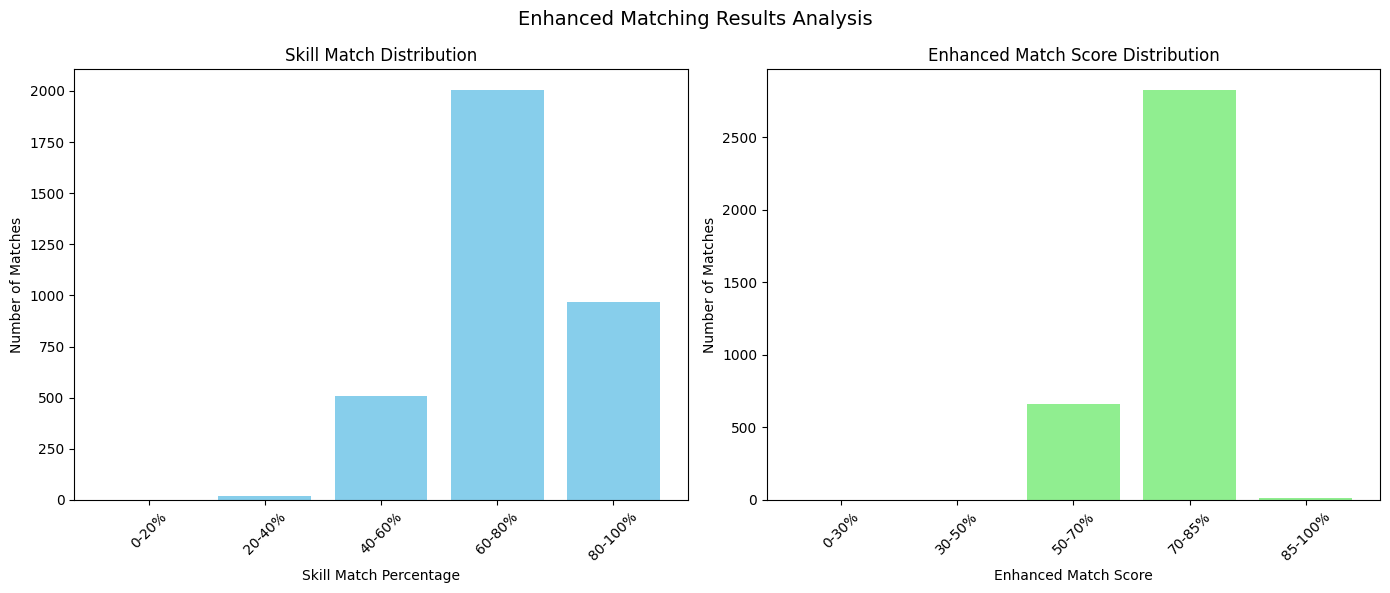


📈 Matching Quality Summary:
   High-skill matches (≥50% skill match): 3482 (99.5%)
   Excellent matches (≥70% both): 1016 (29.0%)


In [25]:
# Cell 13: Match ALL Candidates to ALL Jobs with Enhanced Model (UPDATED)
print("📈 Matching ALL Candidates to Jobs with Enhanced Skills-Based Model")
print("=" * 60)

if 'knn_model' in locals() and 'candidate_features' in locals():
    print(f"Processing {len(candidate_features)} candidates with skills-weighted matching...")
    
    all_matches = []
    
    # Progress tracking
    update_interval = max(1, len(candidate_features) // 10)
    
    for cand_idx in range(len(candidate_features)):
        # Show progress
        if cand_idx % update_interval == 0:
            progress = (cand_idx / len(candidate_features)) * 100
            print(f"   Progress: {progress:.0f}% ({cand_idx}/{len(candidate_features)})")
        
        # Get candidate weighted features
        if cand_idx < len(candidate_skill_features):
            cand_skills = candidate_skill_features[cand_idx]
        else:
            cand_skills = np.zeros(len(all_skills))
        
        cand_other = candidate_features[cand_idx]
        cand_combined = np.hstack([cand_skills, cand_other])
        cand_weighted = cand_combined * global_feature_weights
        
        # Find top 5 matches for this candidate
        distances, indices = knn_model.kneighbors(cand_weighted.reshape(1, -1), n_neighbors=5)
        
        # Get candidate info for skill matching
        cand_id = candidate_ids[cand_idx]
        cand_name = candidate_names[cand_idx]
        original_candidate = candidates_df.iloc[cand_idx]
        
        # Calculate candidate skills list
        cand_skills_list = []
        if 'skills' in original_candidate and pd.notna(original_candidate['skills']):
            if isinstance(original_candidate['skills'], str):
                cand_skills_list = [s.strip().lower() for s in original_candidate['skills'].split(',')]
        
        # Store each match
        for dist, job_idx in zip(distances[0], indices[0]):
            # Calculate enhanced match score
            match_score = max(0, min(100, 100 - (dist * 3)))
            
            # Get job details
            job_id = job_ids[job_idx]
            job = jobs_df.iloc[job_idx]
            
            # Calculate skill match percentage
            job_skills_list = []
            if 'required_skills' in job and pd.notna(job['required_skills']):
                if isinstance(job['required_skills'], str):
                    job_skills_list = [s.strip().lower() for s in job['required_skills'].split(',')]
            
            skill_match_pct = 0
            if job_skills_list:
                matching_skills = set(cand_skills_list) & set(job_skills_list)
                skill_match_pct = (len(matching_skills) / len(job_skills_list)) * 100
            
            all_matches.append({
                'candidate_id': cand_id,
                'candidate_name': cand_name,
                'job_id': job_id,
                'job_title': job['job_title'],
                'company': job['company_name'],
                'enhanced_match_score': match_score,
                'skill_match_percentage': skill_match_pct,
                'matching_skills_count': len(matching_skills) if 'matching_skills' in locals() else 0,
                'required_skills_count': len(job_skills_list),
                'distance': dist,
                'candidate_experience': original_candidate.get('experience_level', ''),
                'job_experience': job.get('experience_level', ''),
                'candidate_location': original_candidate.get('location', ''),
                'job_location': job.get('location', ''),
                'candidate_skills': ', '.join(cand_skills_list[:5]),  # First 5 skills
                'job_required_skills': ', '.join(job_skills_list[:5])  # First 5 required skills
            })
    
    # Convert to DataFrame
    matches_df = pd.DataFrame(all_matches)
    
    print(f"\n✅ Generated {len(matches_df)} candidate-job matches!")
    
    # Calculate overall matching quality
    avg_skill_match = matches_df['skill_match_percentage'].mean()
    avg_enhanced_score = matches_df['enhanced_match_score'].mean()
    
    print(f"\n📊 ENHANCED MATCHING STATISTICS:")
    print(f"   Average skill match: {avg_skill_match:.1f}%")
    print(f"   Average enhanced score: {avg_enhanced_score:.1f}%")
    print(f"   Best skill match: {matches_df['skill_match_percentage'].max():.1f}%")
    
    # Save results
    matches_df.to_csv('ai_model/enhanced_matching_results.csv', index=False)
    print(f"\n💾 Enhanced results saved to: ai_model/enhanced_matching_results.csv")
    
    # Show top 10 skill-based matches
    print(f"\n🏆 TOP 10 SKILL-BASED MATCHES:")
    print("-" * 100)
    
    # Sort by skill match percentage first, then by enhanced score
    top_matches = matches_df.sort_values(
        ['skill_match_percentage', 'enhanced_match_score'], 
        ascending=[False, False]
    ).head(10)
    
    for i, (idx, row) in enumerate(top_matches.iterrows(), 1):
        print(f"{i:2}. {row['candidate_name']:20} → {row['job_title']:30}")
        print(f"     at {row['company']:20}")
        print(f"     🔧 SKILLS: {row['skill_match_percentage']:.1f}% ({row['matching_skills_count']}/{row['required_skills_count']})")
        print(f"     🎯 AI SCORE: {row['enhanced_match_score']:.1f}%")
        print(f"     📍 {row['candidate_location']:15} → {row['job_location']:15}")
        print(f"     🛠️  Candidate skills: {row['candidate_skills']}")
        print(f"     📋 Required skills: {row['job_required_skills']}")
        print()
    
    # Also create a visualization of skill matching distribution
    import matplotlib.pyplot as plt
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle('Enhanced Matching Results Analysis', fontsize=14)
    
    # Skill match distribution
    skill_bins = [0, 20, 40, 60, 80, 100]
    skill_labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
    
    matches_df['skill_bin'] = pd.cut(matches_df['skill_match_percentage'], 
                                    bins=skill_bins, labels=skill_labels)
    skill_dist = matches_df['skill_bin'].value_counts().sort_index()
    
    axes[0].bar(skill_dist.index, skill_dist.values, color='skyblue')
    axes[0].set_title('Skill Match Distribution')
    axes[0].set_xlabel('Skill Match Percentage')
    axes[0].set_ylabel('Number of Matches')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Enhanced score distribution
    score_bins = [0, 30, 50, 70, 85, 100]
    score_labels = ['0-30%', '30-50%', '50-70%', '70-85%', '85-100%']
    
    matches_df['score_bin'] = pd.cut(matches_df['enhanced_match_score'], 
                                    bins=score_bins, labels=score_labels)
    score_dist = matches_df['score_bin'].value_counts().sort_index()
    
    axes[1].bar(score_dist.index, score_dist.values, color='lightgreen')
    axes[1].set_title('Enhanced Match Score Distribution')
    axes[1].set_xlabel('Enhanced Match Score')
    axes[1].set_ylabel('Number of Matches')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📈 Matching Quality Summary:")
    high_skill_matches = matches_df[matches_df['skill_match_percentage'] >= 50]
    print(f"   High-skill matches (≥50% skill match): {len(high_skill_matches)} ({len(high_skill_matches)/len(matches_df)*100:.1f}%)")
    
    excellent_matches = matches_df[
        (matches_df['skill_match_percentage'] >= 70) & 
        (matches_df['enhanced_match_score'] >= 70)
    ]
    print(f"   Excellent matches (≥70% both): {len(excellent_matches)} ({len(excellent_matches)/len(matches_df)*100:.1f}%)")
    
else:
    print("❌ Cannot run enhanced matching - model or features not available")

🔍 Advanced Skill Analysis and Insights
Analyzing 27 unique skills across 600 jobs and 700 candidates...

📊 TOP 10 MOST DEMANDED SKILLS IN JOBS:
 1. kubernetes                     -  87 jobs (14.5%)
 2. docker                         -  87 jobs (14.5%)
 3. marketing                      -  85 jobs (14.2%)
 4. numpy                          -  84 jobs (14.0%)
 5. django                         -  83 jobs (13.8%)
 6. react                          -  83 jobs (13.8%)
 7. construction                   -  82 jobs (13.7%)
 8. communication                  -  78 jobs (13.0%)
 9. javascript                     -  76 jobs (12.7%)
10. java                           -  76 jobs (12.7%)

📊 TOP 10 MOST COMMON CANDIDATE SKILLS:
 1. construction                   - 120 candidates (17.1%)
 2. accounting                     - 119 candidates (17.0%)
 3. tableau                        - 115 candidates (16.4%)
 4. marketing                      - 113 candidates (16.1%)
 5. pandas                         -

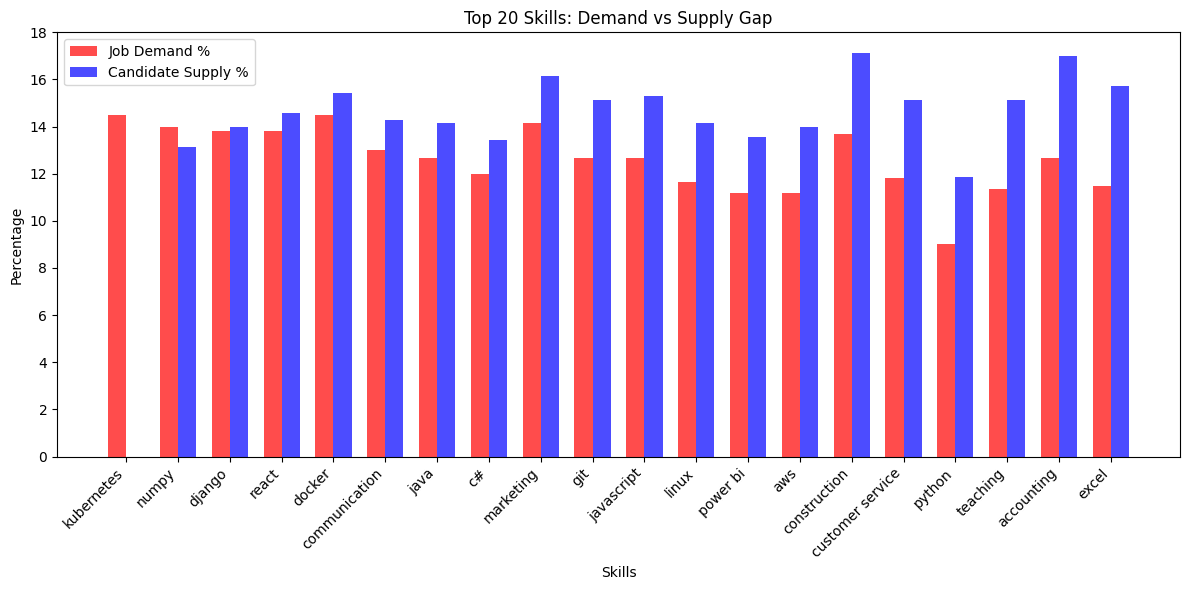


💡 INSIGHTS:
1. High-gap skills indicate areas where candidates need more training
2. Matching focuses more on skills (5x weight) to ensure quality matches
3. Consider these gaps when recommending training to candidates


In [26]:
# Cell 14: Advanced Skill Analysis (NEW)
print("🔍 Advanced Skill Analysis and Insights")
print("=" * 60)

if 'all_skills' in locals():
    print(f"Analyzing {len(all_skills)} unique skills across {len(jobs_df)} jobs and {len(candidates_df)} candidates...")
    
    # Analyze most demanded skills in jobs
    print("\n📊 TOP 10 MOST DEMANDED SKILLS IN JOBS:")
    
    job_skill_counts = np.sum(job_skill_vectors, axis=0)
    top_skill_indices = np.argsort(-job_skill_counts)[:10]
    
    for i, idx in enumerate(top_skill_indices, 1):
        skill_name = all_skills[idx]
        count = int(job_skill_counts[idx])
        percentage = (count / len(jobs_df)) * 100
        print(f"{i:2}. {skill_name:30} - {count:3} jobs ({percentage:.1f}%)")
    
    # Analyze most common skills in candidates
    print("\n📊 TOP 10 MOST COMMON CANDIDATE SKILLS:")
    
    candidate_skill_counts = np.sum(candidate_skill_vectors, axis=0)
    top_cand_indices = np.argsort(-candidate_skill_counts)[:10]
    
    for i, idx in enumerate(top_cand_indices, 1):
        skill_name = all_skills[idx]
        count = int(candidate_skill_counts[idx])
        percentage = (count / len(candidates_df)) * 100
        print(f"{i:2}. {skill_name:30} - {count:3} candidates ({percentage:.1f}%)")
    
    # Skill gap analysis
    print("\n📊 SKILL GAP ANALYSIS:")
    print("Skills that are in high demand but low supply:")
    
    skill_gap_scores = []
    for idx, skill in enumerate(all_skills):
        job_demand = job_skill_counts[idx] / len(jobs_df)
        candidate_supply = candidate_skill_counts[idx] / len(candidates_df)
        
        # Avoid division by zero
        if candidate_supply > 0:
            gap_score = job_demand / candidate_supply
        else:
            gap_score = job_demand * 10  # High penalty if no candidates have skill
        
        skill_gap_scores.append((skill, gap_score, job_demand, candidate_supply))
    
    # Sort by gap score (highest first)
    skill_gap_scores.sort(key=lambda x: x[1], reverse=True)
    
    print("\nTop 10 skills with largest supply-demand gaps:")
    for i, (skill, gap, demand, supply) in enumerate(skill_gap_scores[:10], 1):
        print(f"{i:2}. {skill:30} - Gap: {gap:.2f}x (Demand: {demand*100:.1f}%, Supply: {supply*100:.1f}%)")
    
    # Create skill gap visualization
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Get top 20 skills for visualization
    top_skills = [s[0] for s in skill_gap_scores[:20]]
    top_demand = [s[2] * 100 for s in skill_gap_scores[:20]]  # Convert to percentage
    top_supply = [s[3] * 100 for s in skill_gap_scores[:20]]  # Convert to percentage
    
    x = np.arange(len(top_skills))
    width = 0.35
    
    ax.bar(x - width/2, top_demand, width, label='Job Demand %', color='red', alpha=0.7)
    ax.bar(x + width/2, top_supply, width, label='Candidate Supply %', color='blue', alpha=0.7)
    
    ax.set_xlabel('Skills')
    ax.set_ylabel('Percentage')
    ax.set_title('Top 20 Skills: Demand vs Supply Gap')
    ax.set_xticks(x)
    ax.set_xticklabels(top_skills, rotation=45, ha='right')
    ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    print("\n💡 INSIGHTS:")
    print("1. High-gap skills indicate areas where candidates need more training")
    print("2. Matching focuses more on skills (5x weight) to ensure quality matches")
    print("3. Consider these gaps when recommending training to candidates")

else:
    print("❌ Cannot perform skill analysis - skill data not available")